In [234]:
import pylab as pl
#import scipy as sp
#from scipy.linalg import eig
import numpy as np
from numpy.linalg import eig
from numpy.random import multivariate_normal as mvn
import pdb

In [235]:
def make_data_twoclass(N=100):

    # generates some toy data
    mu = [np.array([0, 3]), np.array([0, -3])]
    C = np.array([[5, 4], [4, 5]])

    X = np.vstack((np.random.multivariate_normal(mu[0], C, 50), np.random.multivariate_normal(mu[1], C, 50)))
    y = np.hstack((np.zeros(50), np.ones(50)))

    colors = "brymcwg"
    fig = pl.figure(figsize=(6,5))
    fig.clf()
    for ic in np.unique(y):
        idx = y == int(ic)
        pl.plot(X[idx,0], X[idx,1], colors[int(ic)]+'o')
        pl.axis('tight')

    pl.xlabel('$X_1$')
    pl.ylabel('$X_2$')
    pl.ylim((-8,8))
    pl.xlim((-8,8))
    pl.show()
    pl.savefig('toydata.pdf')

    return X,y

In [236]:
def fit_logreg(X,Y,its,eta):
    D,N = X.shape[1],X.shape[0]
    # how many classes?
    K = 2
    # add bias to X
    Xo = np.hstack((np.ones((N, 1)), X))
    # init W
    W = np.random.randn(D + 1)

    for it in np.arange(its):
        rn = np.random.randint(N)
        # do the prediction for that point:
        yhat = 1 / (1 + np.exp(-(np.dot(W, Xo[rn]))))
        err = yhat - Y[rn]
        W -= eta * err * Xo[rn]
    return W

def predict_logreg(x,W):
    yhat = 1 / (1 + np.exp(-np.dot(W, x)))
    return yhat

In [237]:
def make_plot_logreg(X,Y,W):

    fig = pl.figure(figsize=(5,4))
    fig.clf()
    colors = "brymcwg"

    # Plot the decision boundary.
    h = .05 # stepsize in mesh
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
    Z = predict_logreg(np.c_[np.ones(xx.ravel().shape[-1]), xx.ravel(), yy.ravel()].T,W)
    Z = Z.reshape(xx.shape)

    cs = pl.contourf(xx, yy, Z, cmap=pl.cm.bwr, alpha=.5)
    pl.axis('tight')
    pl.clim(0., 1.)
    pl.colorbar()
    pl.axis('equal')

    y = Y.argmax(axis=0)
    for ic in np.unique(Y):
        idx = Y == int(ic)
        pl.plot(X[idx,0], X[idx,1], colors[int(ic)]+'o')

    pl.axis('tight')
    pl.xlabel('$X_1$')
    pl.ylabel('$X_2$')
    pl.title('Logistic Regression')
    pl.show()
    pl.savefig('LogReg_prob_twoclass.pdf')

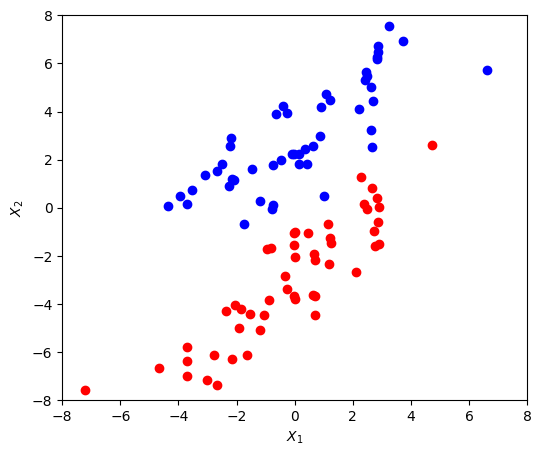

<Figure size 640x480 with 0 Axes>

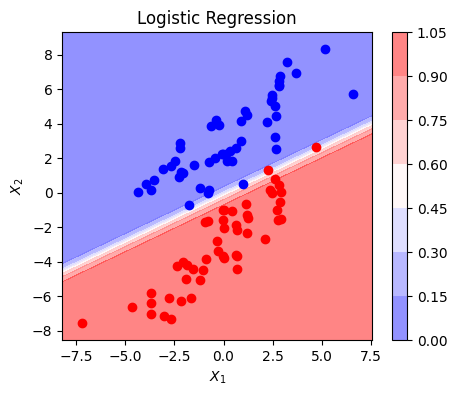

<Figure size 640x480 with 0 Axes>

In [238]:
if __name__ == '__main__':
    X,y = make_data_twoclass()
    Wlogreg = fit_logreg(X,y,40,1.)
    make_plot_logreg(X,y,Wlogreg)